In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sb
from sklearn.metrics import r2_score
import numpy as np

In [4]:
df = pd.read_csv('./credit_card__1_.csv')
df.head(10)
df["card"] = df["card"].map({"yes": 1, "no": 0})
df["owner"] = df["owner"].map({"yes": 1, "no": 0})
df["selfemp"] = df["selfemp"].map({"yes": 1, "no": 0})
df.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
5,1,0,23.25000,2.5000,0.044438,91.996670,0,0,0,54,1,1
6,1,0,27.91667,3.9600,0.012576,40.833330,0,0,2,7,1,5
7,1,0,29.16667,2.3700,0.076434,150.790000,1,0,0,77,1,3
8,1,0,37.00000,3.8000,0.245628,777.821700,1,0,0,97,1,6
9,1,0,28.41667,3.2000,0.019780,52.580000,0,0,0,65,1,18


In [5]:
df.corr()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
card,1.000000,-0.452577,0.000537,0.094308,0.388028,0.365814,0.147826,-0.054340,-0.036126,-0.000268,0.107769,0.080464
reports,-0.452577,1.000000,0.044089,0.011023,-0.159011,-0.136538,-0.053570,0.018835,0.019731,0.048968,-0.007304,0.207755
age,0.000537,0.044089,1.000000,0.324653,-0.115697,0.014948,0.367749,0.100421,0.212146,0.436426,0.009777,0.181070
income,0.094308,0.011023,0.324653,1.000000,-0.054429,0.281104,0.324776,0.112294,0.317601,0.130346,0.107138,0.180540
share,0.388028,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.015764,-0.078905,-0.082618,-0.055348,0.051470,-0.023474
expenditure,0.365814,-0.136538,0.014948,0.281104,0.838779,1.000000,0.093180,-0.035638,0.052664,-0.029007,0.077514,0.054724
owner,0.147826,-0.053570,0.367749,0.324776,-0.015764,0.093180,1.000000,0.041673,0.309190,0.238652,0.063851,0.274924
selfemp,-0.054340,0.018835,0.100421,0.112294,-0.078905,-0.035638,0.041673,1.000000,0.042096,0.065912,0.004854,0.029555
dependents,-0.036126,0.019731,0.212146,0.317601,-0.082618,0.052664,0.309190,0.042096,1.000000,0.046512,0.010285,0.107133
months,-0.000268,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.238652,0.065912,0.046512,1.000000,-0.041447,0.100028


In [6]:
y = df["card"]
x_train = df["reports"].to_numpy().reshape(-1, 1) # тк самая большая корреляция
x_test = pd.DataFrame([1])

In [7]:
model_reg = LinearRegression()
model_logreg = LogisticRegression()

In [8]:
model_reg.fit(x_train, y)

LinearRegression()

In [9]:
model_logreg.fit(x_train, y)

LogisticRegression()

In [32]:
y_pred_reg = model_reg.predict(x_train)
y_pred_log_reg = model_logreg.predict(x_train)

vs = pd.DataFrame()
vs["LInear"] = y_pred_reg
vs["Logistic"] = y_pred_log_reg
vs["LInear"] = vs["LInear"].apply(lambda x: 1 if x > 0.5 else 0)
vs.head(20)


,LInear,Logistic
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [11]:
model_reg.score(x_train, y)

0.2048258114709306

In [12]:
model_logreg.score(x_train, y)

0.8407884761182715

In [13]:
r2_score(y, y_pred_reg) 

0.2048258114709306

In [15]:
r2_score(y, y_pred_reg)

0.2048258114709306

In [13]:
model_reg.predict(x_test)

array([0.69926348])

In [14]:
model_logreg.predict(x_test)

array([1])

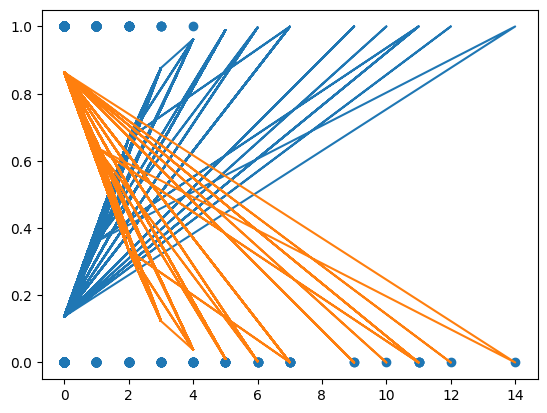

In [26]:
# sb.regplot(x=x_train, y=y, data=df, logistic= True , ci= None)
plt.scatter(x_train, y)
plt.plot(x_train, y_pred_log_reg)
plt.show()

In [16]:
df["card_pred_log"] = model_logreg.predict(x_mnogo)
df["card_pred_lin"] = model_reg.predict(x_mnogo)
df["card_pred_lin"] = df["card_pred_lin"].apply(lambda x: 1 if x < 1 else 0)

In [17]:
df.head(40)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card_pred_log,card_pred_lin
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1,1
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1,1
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1,1
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1,1
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1,1
5,1,0,23.25000,2.5000,0.044438,91.996670,0,0,0,54,1,1,1,1
6,1,0,27.91667,3.9600,0.012576,40.833330,0,0,2,7,1,5,1,1
7,1,0,29.16667,2.3700,0.076434,150.790000,1,0,0,77,1,3,1,1
8,1,0,37.00000,3.8000,0.245628,777.821700,1,0,0,97,1,6,1,0
9,1,0,28.41667,3.2000,0.019780,52.580000,0,0,0,65,1,18,1,1
